In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# Drop the column since it has most values missing
df['Cabin'].isna().sum()
# PassengerId, Name are not useful so drop those columns
df = df.drop(['PassengerId', 'Name','Cabin','Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


Survived : 0
Pclass : 0
Sex : 0
Age : 86
SibSp : 0
Parch : 0
Fare : 1
Embarked : 0


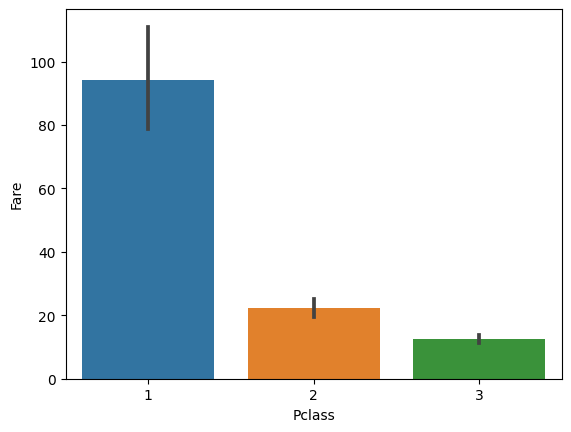

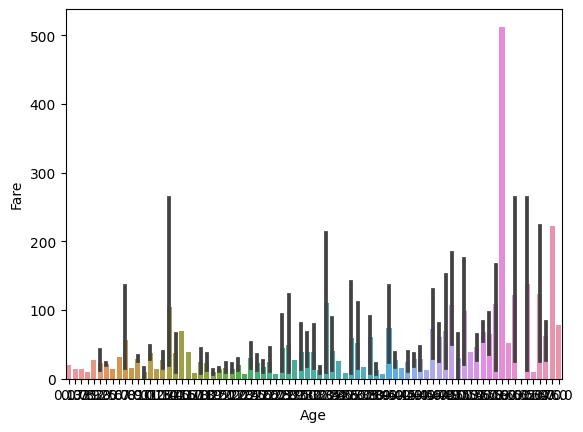

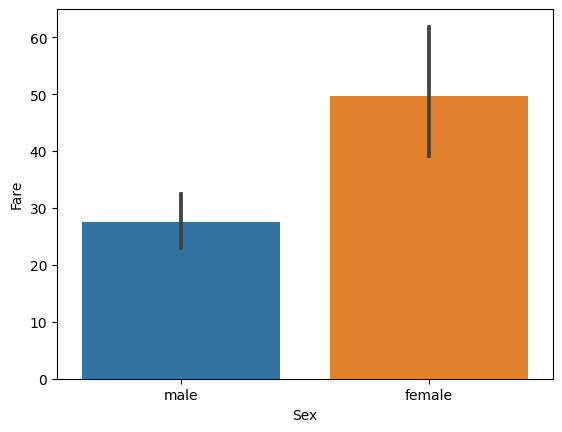

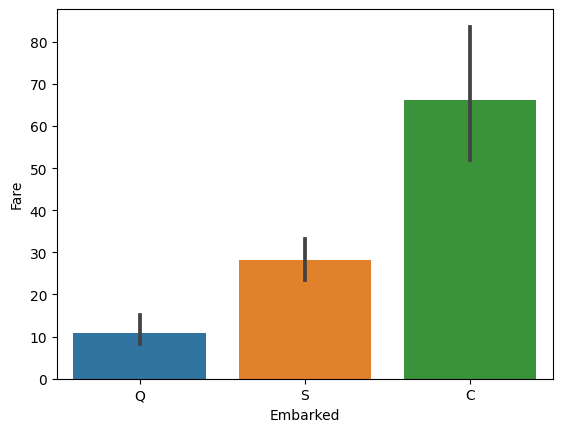

In [4]:
# Preprocessing for missing values
# print count of missing values in all the columns

for i in df:
    print(i,':',df[i].isnull().sum())

# To help fill the missing value in Fare we will try to figure out some relations
df["Pclass"].value_counts()

# Heatmap to find out the missing value in fare which depends on pclass sex age and embarked
sns.barplot(x="Pclass", y="Fare", data=df)
plt.show()
sns.barplot(x="Age", y="Fare", data=df)
plt.show()
sns.barplot(x="Sex", y="Fare", data=df)
plt.show()
sns.barplot(x="Embarked", y="Fare", data=df)

# Display the plot
plt.show()


In [5]:
# This shows there is good amount of relation between fare and pclass,sex,embarked
# Use the average fare based on the pclass, sex,embarked for each group
df_grouped = df.groupby(['Pclass', 'Sex', 'Embarked'])['Fare'].mean().reset_index()


df = pd.merge(df, df_grouped, on=['Pclass', 'Sex', 'Embarked'], how='left', suffixes=('', '_average'))
df['Fare'].fillna(df['Fare_average'], inplace=True)
df.drop(columns=['Fare_average'], inplace=True)
df




,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [6]:
print(df.iloc[:][152:153])

     Survived  Pclass   Sex   Age  SibSp  Parch       Fare Embarked
152         0       3  male  60.5      0      0  12.718872        S


In [7]:
# checking the estimated value lies in the range of its group
filtered_data = df[(df['Pclass'] == 3) & (df['Sex'] == 'male') & (df['Embarked'] == 'S')&(df['Age']>45)]

# Display the filtered data
print(filtered_data)

     Survived  Pclass   Sex   Age  SibSp  Parch       Fare Embarked
25          0       3  male  50.0      1      0  14.500000        S
152         0       3  male  60.5      0      0  12.718872        S


In [8]:
# print the records where age is missing to analyze the data
missing_age_data = df[(df['Age'].isna())]
print(missing_age_data)

     Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
10          0       3    male  NaN      0      0   7.8958        S
22          1       1  female  NaN      0      0  31.6833        S
29          0       3    male  NaN      2      0  21.6792        C
33          1       3  female  NaN      1      2  23.4500        S
36          1       3  female  NaN      0      0   8.0500        S
..        ...     ...     ...  ...    ...    ...      ...      ...
408         1       3  female  NaN      0      0   7.7208        Q
410         1       3  female  NaN      0      0   7.7500        Q
413         0       3    male  NaN      0      0   8.0500        S
416         0       3    male  NaN      0      0   8.0500        S
417         0       3    male  NaN      1      1  22.3583        C

[86 rows x 8 columns]


            Age     SibSp     Parch
Age    1.000000 -0.091587 -0.061249
SibSp -0.091587  1.000000  0.306895
Parch -0.061249  0.306895  1.000000


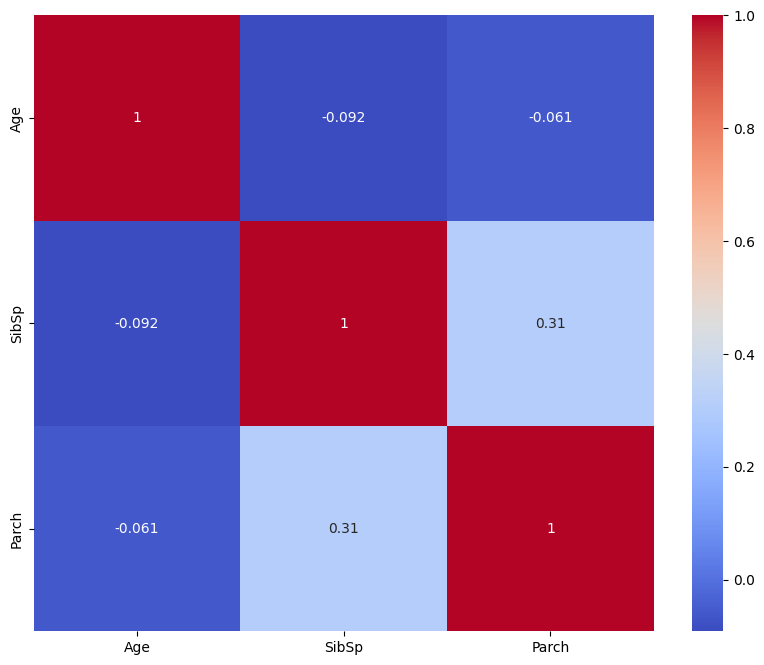

In [9]:
correlation = df[['Age', 'SibSp', 'Parch']].corr()
print(correlation)
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

The Heatmap shows that there is no strong relationship between Age,Sibsp and Parch

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.572384
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.851741
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


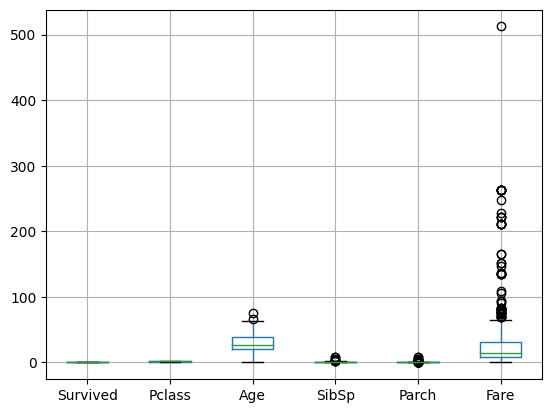

In [10]:
df.boxplot()
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,331.000000,417.000000,417.000000,417.000000
mean,0.362110,2.268585,30.188822,0.448441,0.390887,34.429082
std,0.481188,0.840556,14.120175,0.897568,0.982155,50.786003
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.387500
max,1.000000,3.000000,76.000000,8.000000,9.000000,263.000000


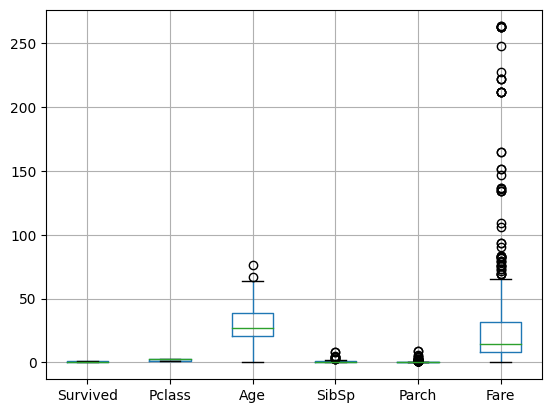

In [11]:
# Remove the outlier
df = df[df['Fare'] < 500]
df.boxplot()
df.describe()

In [12]:
# We will use two methods to fill the missing data for age simple imputer and deep learning method using data twig then find out which performs better


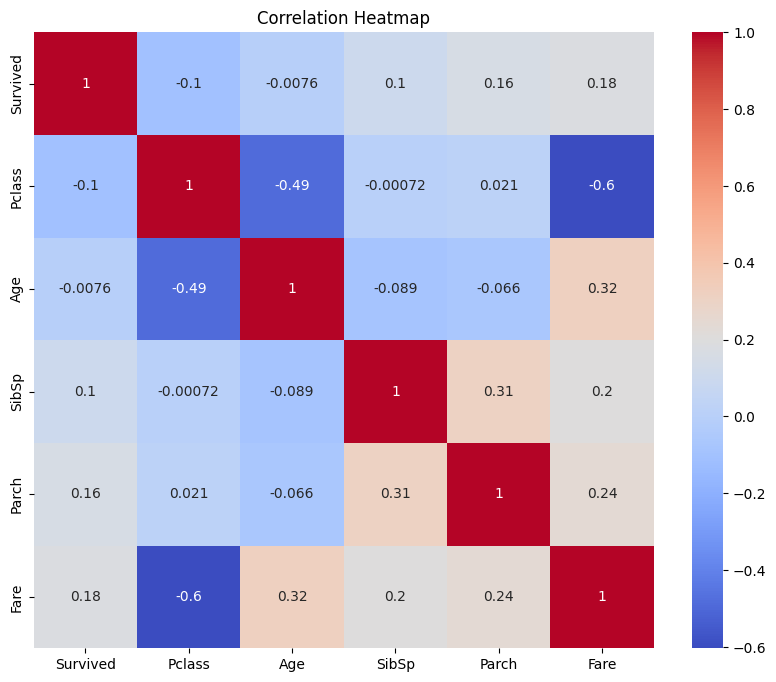

In [13]:
corr = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [15]:
import numpy as np
from sklearn.impute import SimpleImputer

def fill_missing_values(df):
    # Create a SimpleImputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Fill missing values
    df["Age"] = imputer.fit_transform(df[["Age"]])

    return df


In [16]:
df_simple_imp = df.copy()
fill_missing_values(df_simple_imp)

df_simple_imp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.500000,0,0,7.8292,Q
1,1,3,female,47.000000,1,0,7.0000,S
2,0,2,male,62.000000,0,0,9.6875,Q
3,0,3,male,27.000000,0,0,8.6625,S
4,1,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.188822,0,0,8.0500,S
414,1,1,female,39.000000,0,0,108.9000,C
415,0,3,male,38.500000,0,0,7.2500,S
416,0,3,male,30.188822,0,0,8.0500,S


In [17]:
df_mlp = df.copy()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Convert 'Sex' column to numerical values
df_mlp['Sex'] = df_mlp['Sex'].map({'male': 0, 'female': 1})

# One-hot encode the 'Embarked' column
df_mlp = pd.get_dummies(df_mlp, columns=['Embarked'], drop_first=True)

# Split data into rows with missing Age and rows without
missing_age_data = df_mlp[df_mlp['Age'].isnull()]
known_age_data = df_mlp.dropna(subset=['Age'])

# Separate features and target for known_age_data
X = known_age_data.drop('Age', axis=1)
y = known_age_data['Age']

# MICE imputation for other columns (excluding Age)
imputer = IterativeImputer(max_iter=10, random_state=42, skip_complete=True)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP regressor model
regressor = MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=500, alpha=0.0001,
                         solver='adam', verbose=10, random_state=21, tol=0.000000001)

# Train the model
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")



Iteration 1, loss = 634.67140419
Iteration 2, loss = 633.79661903
Iteration 3, loss = 632.93131348
Iteration 4, loss = 632.11097717
Iteration 5, loss = 631.28657155
Iteration 6, loss = 630.47636281
Iteration 7, loss = 629.67724417
Iteration 8, loss = 628.88025064
Iteration 9, loss = 628.09984938
Iteration 10, loss = 627.34761279
Iteration 11, loss = 626.59001495
Iteration 12, loss = 625.83851195
Iteration 13, loss = 625.10083979
Iteration 14, loss = 624.37495221
Iteration 15, loss = 623.68156541
Iteration 16, loss = 622.99706208
Iteration 17, loss = 622.31351363
Iteration 18, loss = 621.67004676
Iteration 19, loss = 621.02605748
Iteration 20, loss = 620.41730803
Iteration 21, loss = 619.79588428
Iteration 22, loss = 619.21024518
Iteration 23, loss = 618.62980691
Iteration 24, loss = 618.08588795
Iteration 25, loss = 617.54931316
Iteration 26, loss = 617.04081329
Iteration 27, loss = 616.54661625
Iteration 28, loss = 616.04796843
Iteration 29, loss = 615.58016400
Iteration 30, loss = 61

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The simple MLP Regressor doesnt give a good performace with rmse = 140

In [18]:
df_knn_impute = df.copy()
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert 'Sex' column to numerical values
df_knn_impute['Sex'] = df_knn_impute['Sex'].map({'male': 0, 'female': 1})

# One-hot encode the 'Embarked' column
df_knn_impute = pd.get_dummies(df_knn_impute, columns=['Embarked'], drop_first=True)

# Separate rows with and without missing Age values
missing_age_data = df_knn_impute[df_knn_impute['Age'].isnull()]
known_age_data = df_knn_impute.dropna(subset=['Age'])

# Separate features for known_age_data (keep 'Age' for now)
X_known = known_age_data
y_known = known_age_data['Age']

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
X_train_imputed = knn_imputer.fit_transform(X_train_scaled)
X_test_imputed = knn_imputer.transform(X_test_scaled)

# Extract the imputed Age values for the test set
imputed_ages = X_test_imputed[:, X_train.columns.get_loc("Age")]

# Calculate the RMSE for the imputed ages on the test set
mse = mean_squared_error(y_test, imputed_ages)
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse:.4f}")




Root Mean Squared Error: 29.0745


Since rmse is 29 its not good for the model performance

No we will consider two cases either by dropping the age column and using simple imputer


In [19]:
print(df_simple_imp)
print(df)


     Survived  Pclass     Sex        Age  SibSp  Parch      Fare Embarked
0           0       3    male  34.500000      0      0    7.8292        Q
1           1       3  female  47.000000      1      0    7.0000        S
2           0       2    male  62.000000      0      0    9.6875        Q
3           0       3    male  27.000000      0      0    8.6625        S
4           1       3  female  22.000000      1      1   12.2875        S
..        ...     ...     ...        ...    ...    ...       ...      ...
413         0       3    male  30.188822      0      0    8.0500        S
414         1       1  female  39.000000      0      0  108.9000        C
415         0       3    male  38.500000      0      0    7.2500        S
416         0       3    male  30.188822      0      0    8.0500        S
417         0       3    male  30.188822      1      1   22.3583        C

[417 rows x 8 columns]
     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0      

Using mean imputation for age

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd

def evaluate_models(X, y):
    # Encode 'Sex' column
    X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
    
    # One-hot encode the 'Embarked' column
    X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Define the models
    models = {
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(probability=True),
        'Logistic Regression': LogisticRegression(max_iter=1000)
    }
    
    # Compute accuracy scores and RMSE for each model
    accuracy_scores = {}
    rmse_scores = {}
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[model_name] = accuracy
        
        # RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores[model_name] = rmse

    # Print the scores for each model
    for model_name in models.keys():
        print(f"{model_name} - Accuracy: {accuracy_scores[model_name]:.4f}, RMSE: {rmse_scores[model_name]:.4f}")
    
    return accuracy_scores, rmse_scores

X, y = df_simple_imp.drop("Survived",1),df["Survived"]
accuracy_results, rmse_results = evaluate_models(X, y)


Random Forest - Accuracy: 1.0000, RMSE: 0.0000
SVM - Accuracy: 0.9921, RMSE: 0.0891
Logistic Regression - Accuracy: 1.0000, RMSE: 0.0000


C:\Users\User\AppData\Local\Temp\ipykernel_4080\27227348.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X, y = df_simple_imp.drop("Survived",1),df["Survived"]


In [21]:
# using drop the age column completely
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd

def evaluate_models(X, y):
    # Encode 'Sex' column
    X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
    
    # One-hot encode the 'Embarked' column
    X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Define the models
    models = {
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(probability=True),
        'Logistic Regression': LogisticRegression(max_iter=1000)
    }
    
    # Compute accuracy scores and RMSE for each model
    accuracy_scores = {}
    rmse_scores = {}
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[model_name] = accuracy
        
        # RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores[model_name] = rmse

    # Print the scores for each model
    for model_name in models.keys():
        print(f"{model_name} - Accuracy: {accuracy_scores[model_name]:.4f}, RMSE: {rmse_scores[model_name]:.4f}")
    
    
    for k,v in models.items():
       cm = confusion_matrix(y_test, v.predict(X_test)) 
       #extracting TN, FP, FN, TP
       TN, FP, FN, TP = confusion_matrix(y_test, v.predict(X_test)).ravel()
       print(cm)
       print('Model[{}] Testing Accuracy = "{} !"'.format(k,  (TP + TN) / (TP + TN + FN + FP)))
       print()# Print a new line
    
    return accuracy_scores, rmse_scores

X, y = df.drop(["Survived","Age"],1),df["Survived"]
accuracy_results, rmse_results = evaluate_models(X, y)


C:\Users\User\AppData\Local\Temp\ipykernel_4080\138005067.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X, y = df.drop(["Survived","Age"],1),df["Survived"]


Random Forest - Accuracy: 1.0000, RMSE: 0.0000
SVM - Accuracy: 0.9921, RMSE: 0.0891
Logistic Regression - Accuracy: 1.0000, RMSE: 0.0000
[[78  0]
 [ 0 48]]
Model[Random Forest] Testing Accuracy = "1.0 !"

[[78  0]
 [ 1 47]]
Model[SVM] Testing Accuracy = "0.9920634920634921 !"

[[78  0]
 [ 0 48]]
Model[Logistic Regression] Testing Accuracy = "1.0 !"



Since, training accuracy and testing accuracy for Random Forest classifier is 100%. We will use this model

In [22]:
df_simple_imp["Embarked"].value_counts()

S    270
C    101
Q     46
Name: Embarked, dtype: int64

So, from the above its clear that we can use any of Random Forest or Logistic Regression on any of the two datasets so as to predict the output
However further we will go with Random forest method as its primarily used for classification

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score


def preprocess_data(df1):
    # Encode 'Sex' column
    df1['Sex'] = df1['Sex'].map({'male': 0, 'female': 1})
    
    # One-hot encode the 'Embarked' column
    df1 = pd.get_dummies(df1, columns=['Embarked'], prefix='Embarked')
    
    
    return df1

# Split the data
df_simple_imp['Embarked'] = pd.Categorical(df_simple_imp['Embarked'], categories=['Q', 'S', 'C'])
df_simple_imp = preprocess_data(df_simple_imp)
X = df_simple_imp.drop('Survived', axis=1)
y = df_simple_imp['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")





Accuracy: 1.0000


In [24]:
# Predict survival based on input data
def predict_survival(input_data):
    # Preprocess the input data
    input_df = pd.DataFrame([input_data],columns=df.drop("Survived",1).columns)

    input_df['Sex'] = input_df['Sex'].map({'male': 0, 'female': 1})
    # One-hot encode the 'Embarked' column
    input_df['Embarked'] = pd.Categorical(input_df['Embarked'], categories=['Q', 'S', 'C'])
    input_df = pd.get_dummies(input_df, columns=['Embarked'], prefix='Embarked')
    print(input_df)
    # Scale the input data
    input_scaled = scaler.transform(input_df)
    
    # Predict using the trained model
    prediction = clf.predict(input_scaled)
    return "Survived" if prediction[0] == 1 else "Did not survive"

# Usage
input_data = {
    'Pclass': 3,
    'Sex': 'female',
    'Age': 45.0,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}
print(predict_survival(input_data))


   Pclass  Sex   Age  SibSp  Parch  Fare  Embarked_Q  Embarked_S  Embarked_C
0       3    1  45.0      1      0  7.25           0           1           0
Survived


C:\Users\User\AppData\Local\Temp\ipykernel_4080\533615745.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  input_df = pd.DataFrame([input_data],columns=df.drop("Survived",1).columns)
